In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [332]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['type_dt']= 'train'
test['type_dt'] = 'test'
full = pd.concat([train, test])

In [333]:
full.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  type_dt  
0       WD         Normal   208500.0    train  
1       WD         Normal   181500.0    train  
2       WD         Normal   223500.0    train  
3       WD        Abnorml   140000.0    train  
4       WD         Normal   250000.0    train  

[5 rows x 82 columns]

In [334]:
full.shape

(2919, 82)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

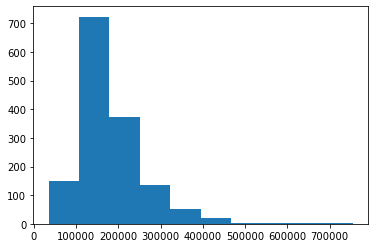

In [335]:
plt.hist(train['SalePrice'])

# 1 Evaluando valores nulos

In [336]:
null_values = full.isnull().sum().sort_values(ascending=False)

In [337]:
check_nulls_keys = []
for key,value in null_values.items():
    percent_null = (100*value)/len(full)
    if(percent_null > 30):
        check_nulls_keys.append(key)

In [338]:
check_nulls_keys = check_nulls_keys[:4]
check_nulls_keys

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [339]:
full = full.drop(columns=check_nulls_keys)

In [340]:
full.shape

(2919, 78)

# Selecting categorical features

In [341]:
cols = full.columns
num_cols = full._get_numeric_data().columns
categorical_columns = list(set(cols) - set(num_cols))

In [342]:
categorical_columns

['GarageQual',
 'LandSlope',
 'LandContour',
 'Utilities',
 'Functional',
 'type_dt',
 'Heating',
 'BsmtCond',
 'LotConfig',
 'RoofMatl',
 'ExterCond',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'Electrical',
 'BsmtExposure',
 'CentralAir',
 'LotShape',
 'GarageCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'Condition2',
 'ExterQual',
 'HeatingQC',
 'Street',
 'Condition1',
 'FireplaceQu',
 'Neighborhood',
 'RoofStyle',
 'GarageType',
 'GarageFinish',
 'BsmtQual',
 'BldgType',
 'SaleCondition',
 'PavedDrive',
 'Foundation',
 'MasVnrType']

# EDA In categorical Columns

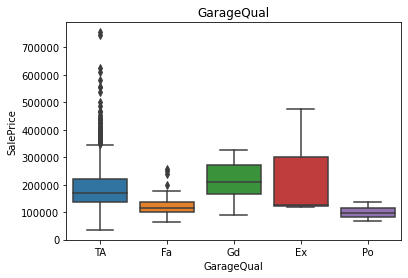

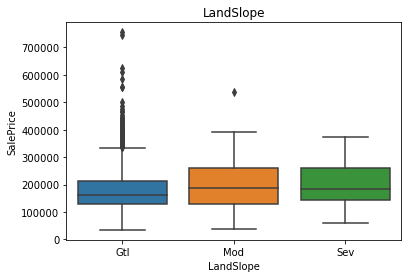

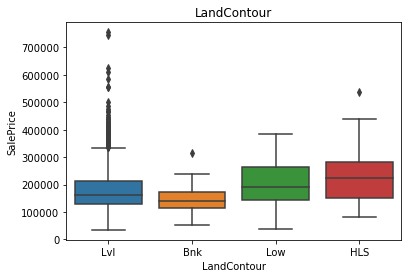

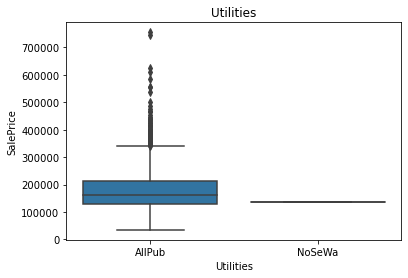

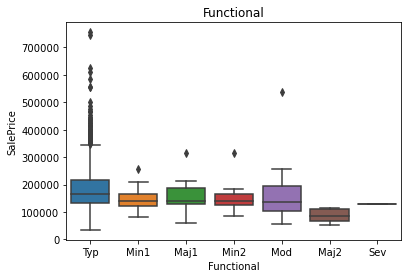

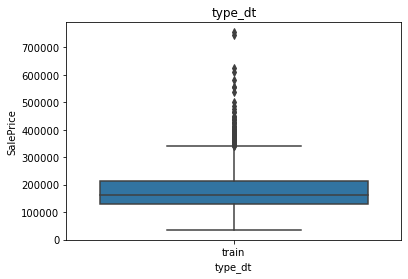

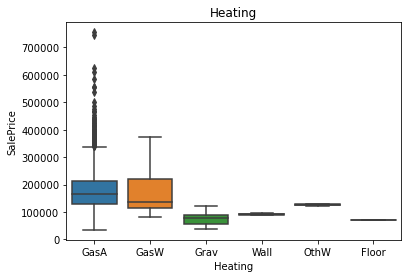

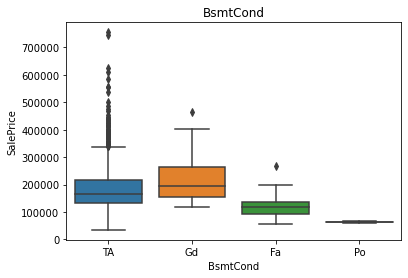

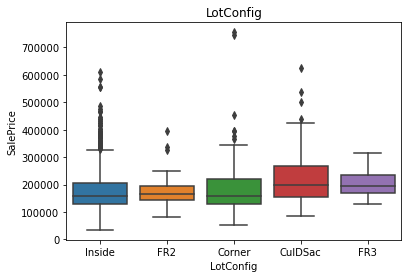

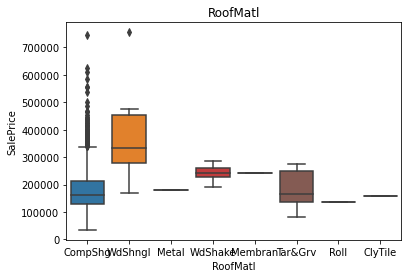

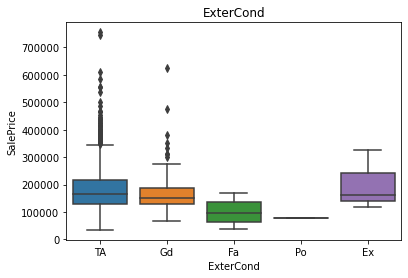

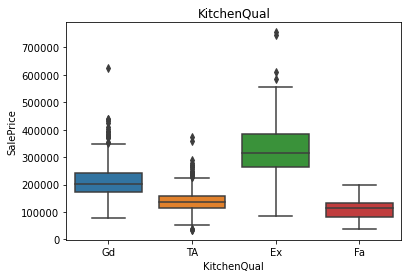

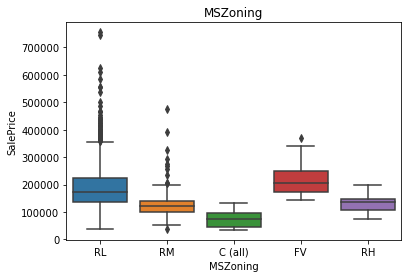

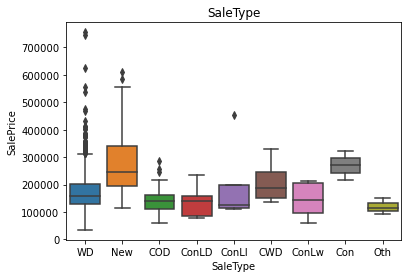

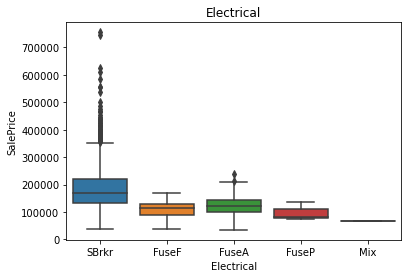

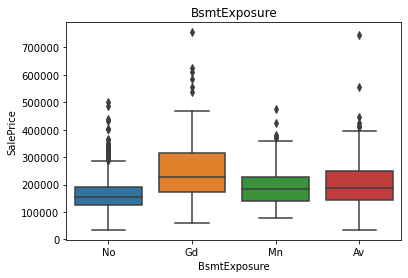

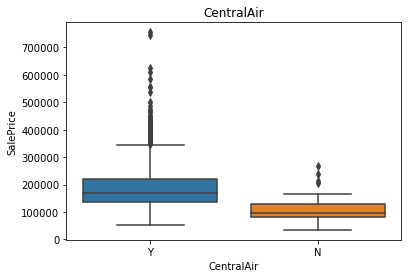

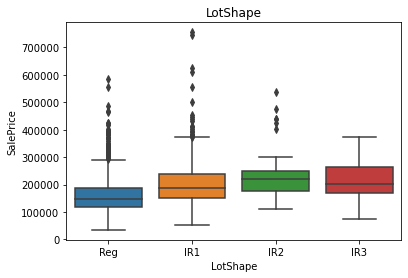

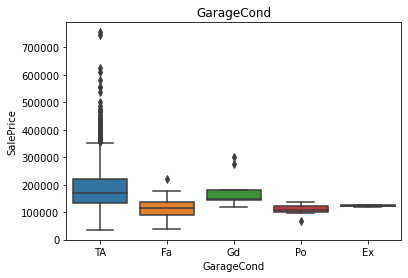

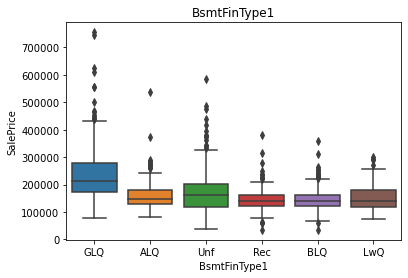

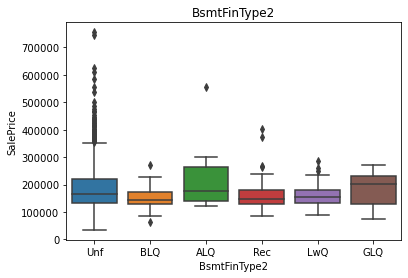

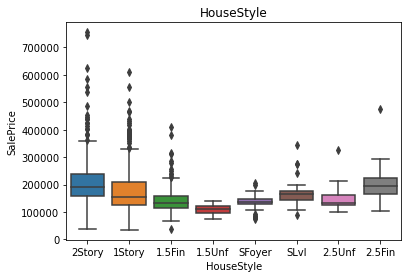

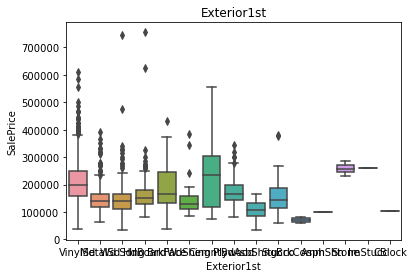

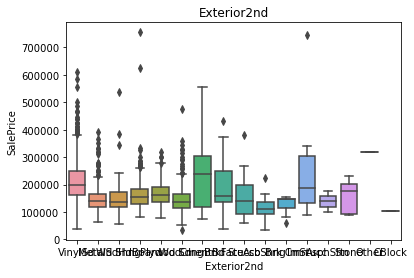

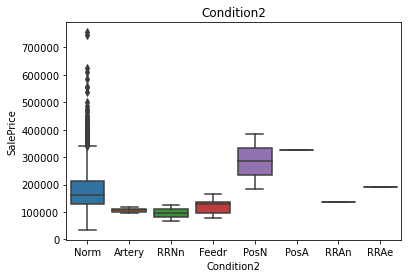

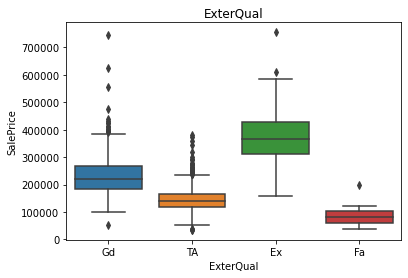

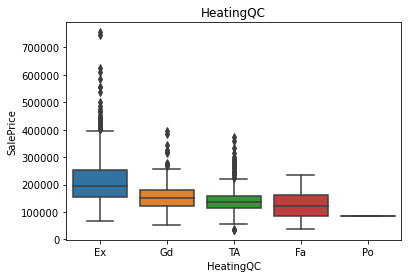

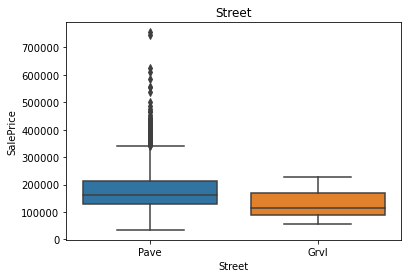

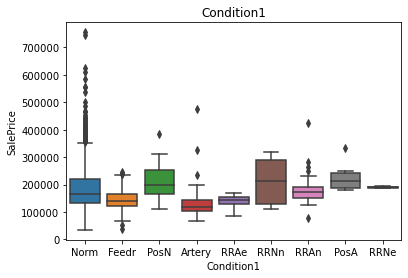

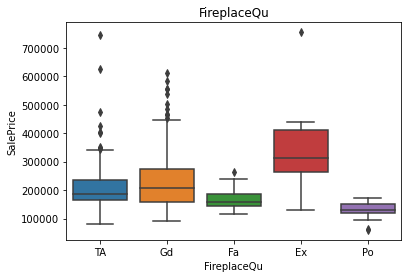

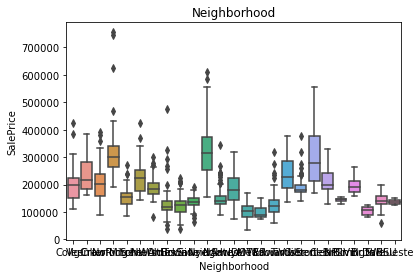

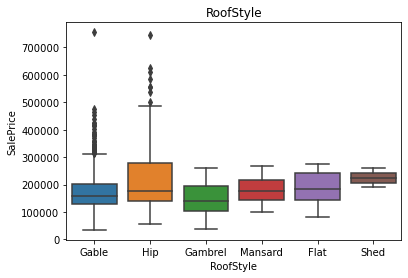

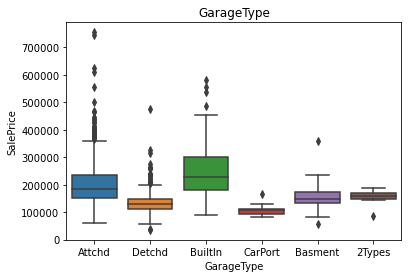

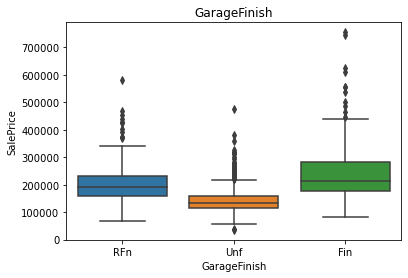

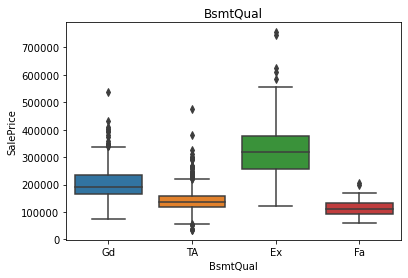

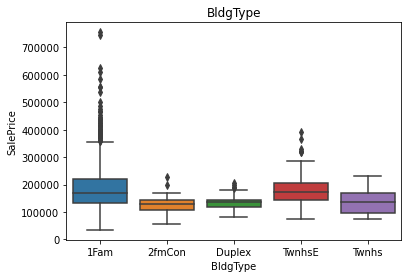

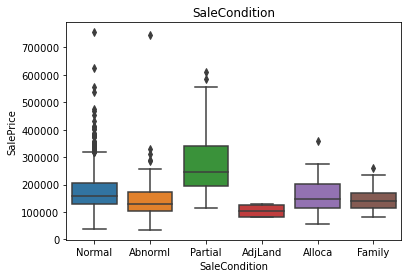

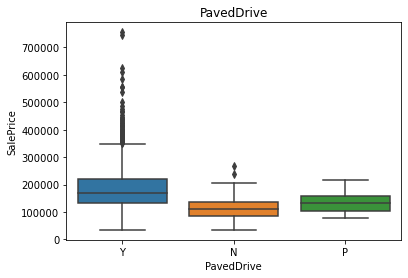

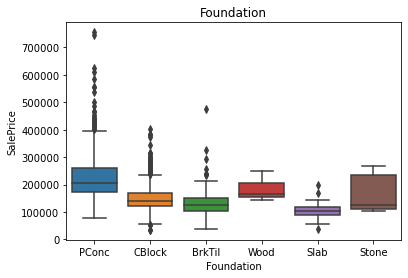

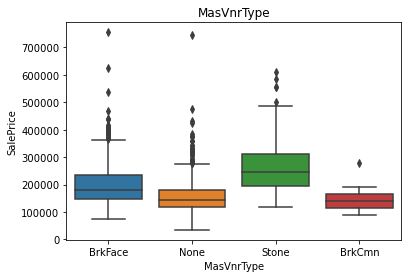

In [294]:
for x in range(len(categorical_columns)):
    sns.boxplot(data=train,x=categorical_columns[x],y='SalePrice')
    plt.title(categorical_columns[x])
    plt.show()

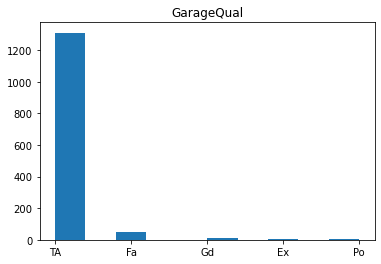

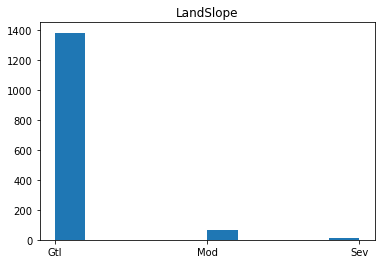

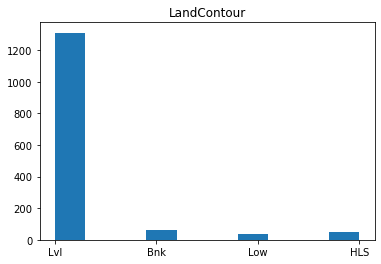

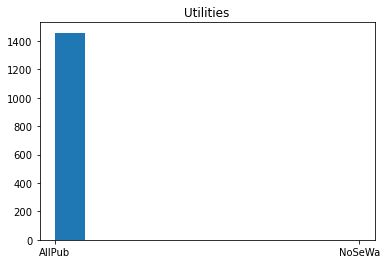

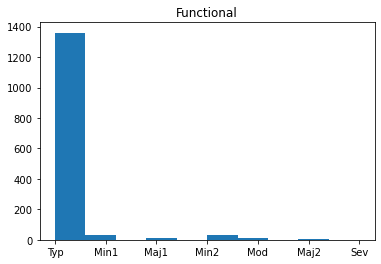

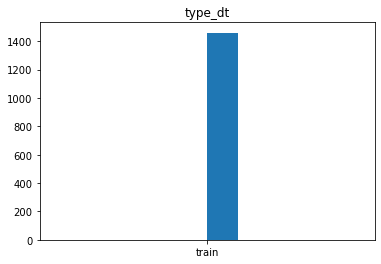

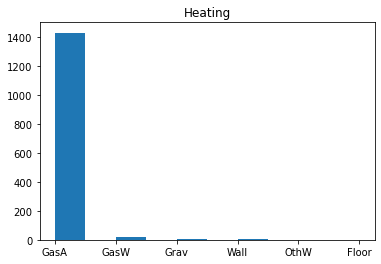

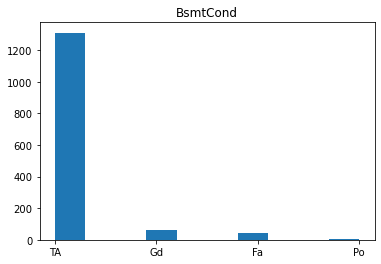

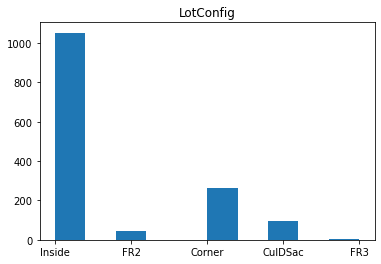

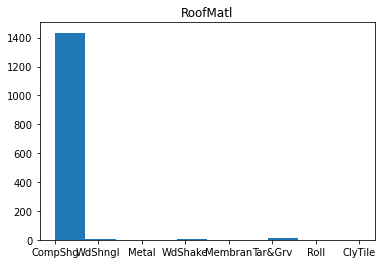

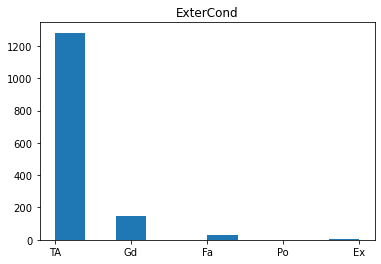

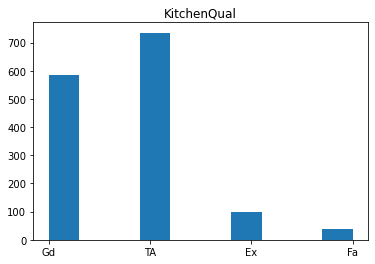

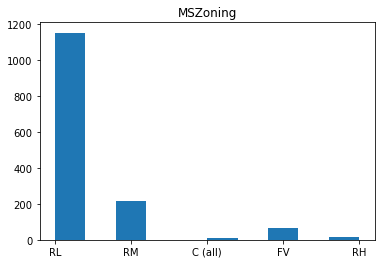

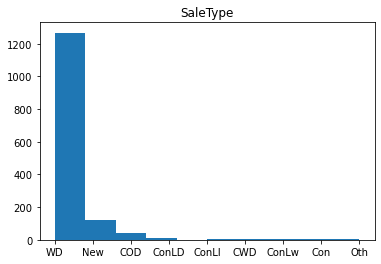

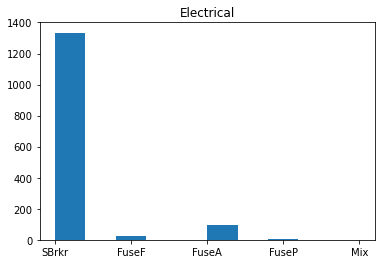

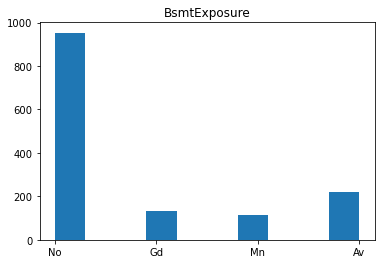

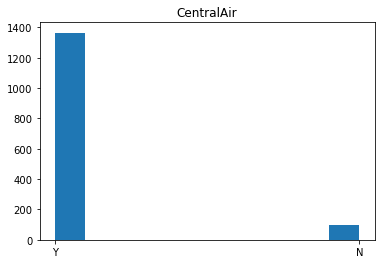

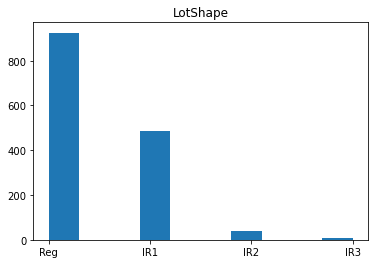

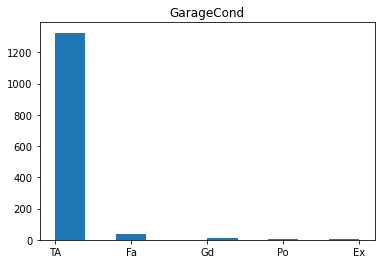

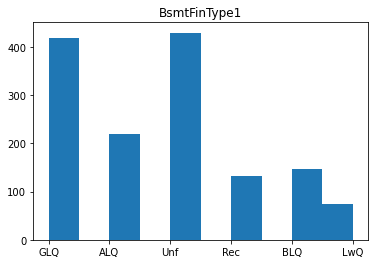

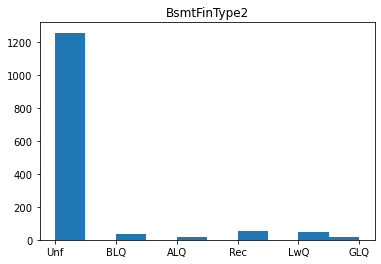

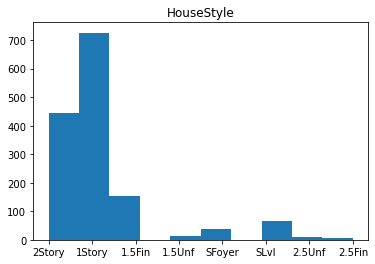

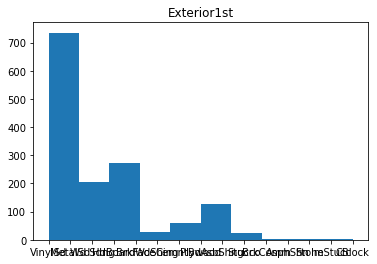

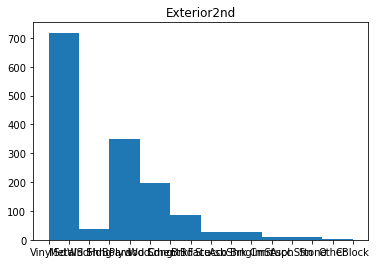

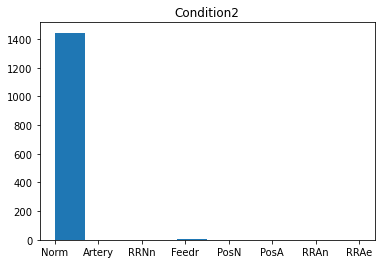

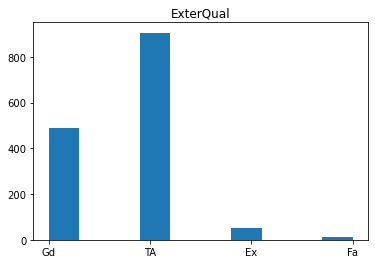

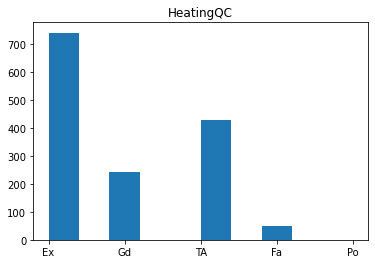

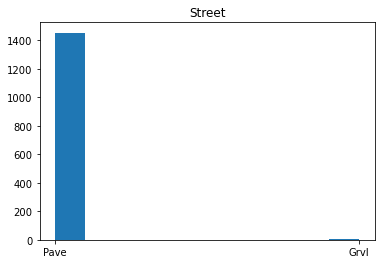

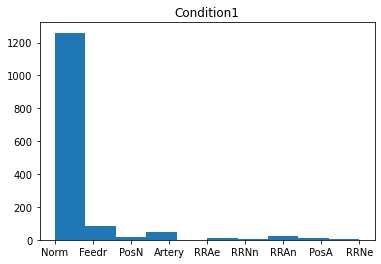

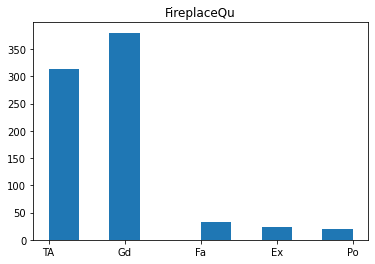

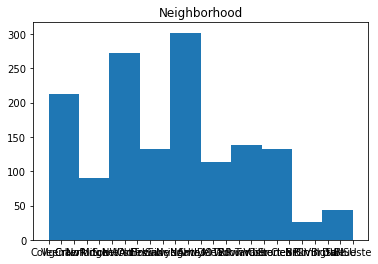

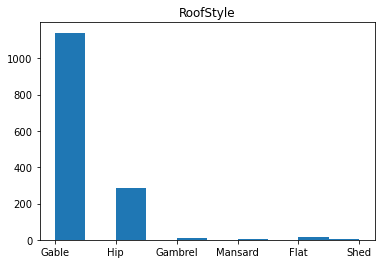

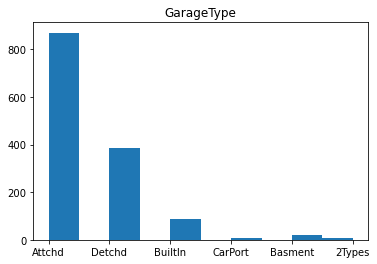

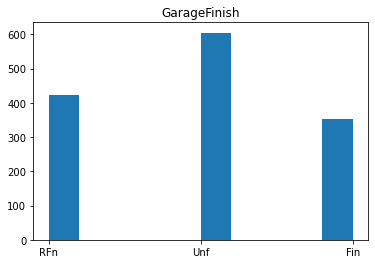

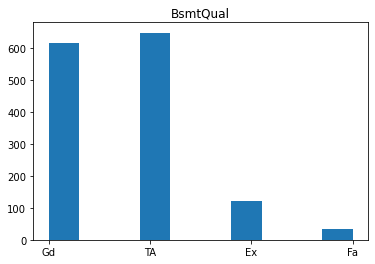

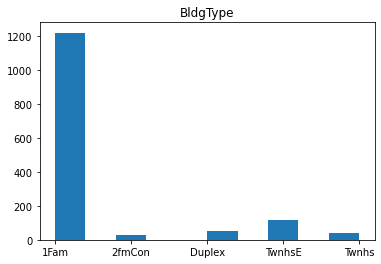

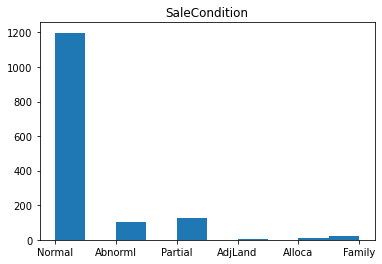

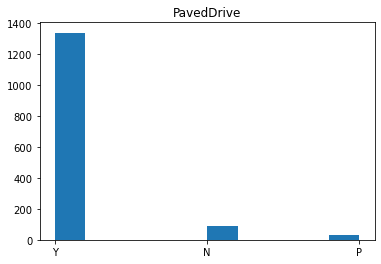

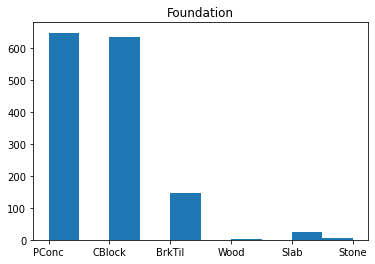

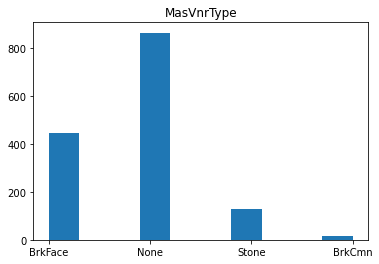

In [296]:
for x in range(len(categorical_columns)):
    plt.hist(train[~train[categorical_columns[x]].isnull()][categorical_columns[x]])
    plt.title(categorical_columns[x])
    plt.show()

## Selecting best categorical features

In [343]:
categorical_columns_select = ['MSZoning','Electrical','KitchenQual','RoofStyle','Neighborhood','BsmtQual','ExterQual','BsmtExposure','HouseStyle','GarageFinish','BsmtFinType1','GarageType']

## Cleaning Data and selecting numerical features

In [344]:
full.drop('Id', axis=1, inplace=True)
full.drop('MoSold',axis=1, inplace= True)
full.drop('YrSold',axis=1, inplace= True)

train.drop('Id', axis=1, inplace=True)
train.drop('MoSold',axis=1, inplace= True)
train.drop('YrSold',axis=1, inplace= True)

In [345]:
num_cols = train._get_numeric_data().columns
df_num = train[num_cols]

In [346]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

# EDA In numerical Columns

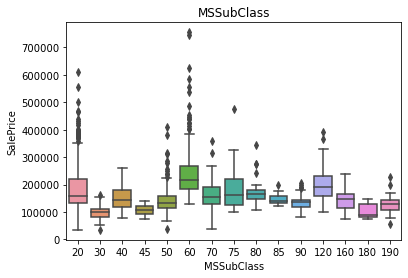

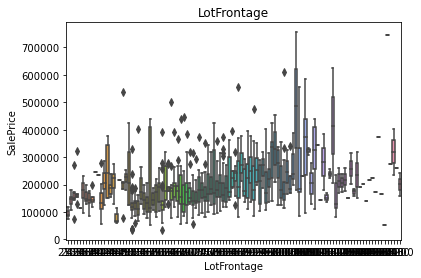

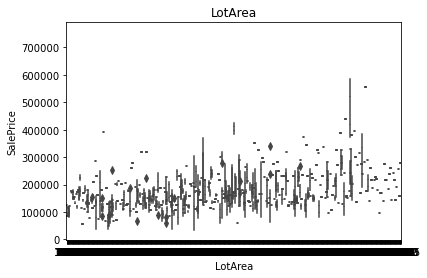

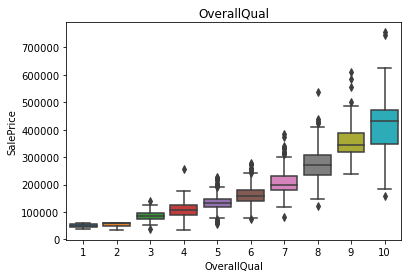

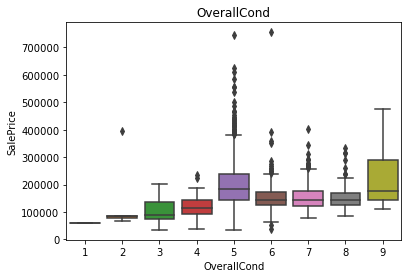

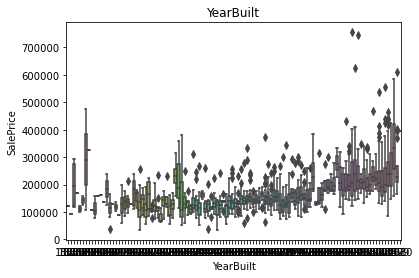

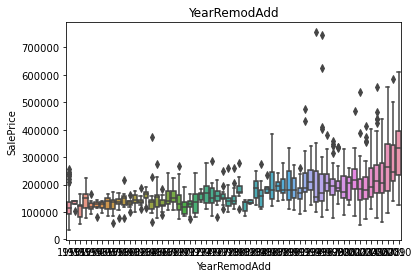

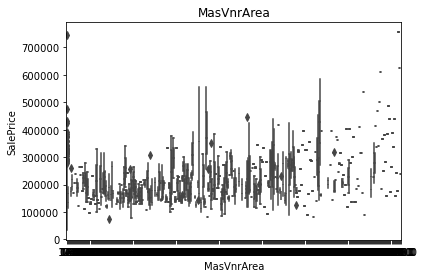

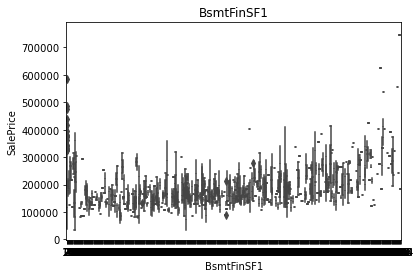

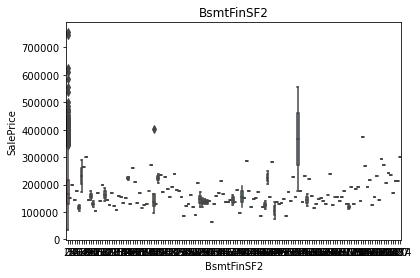

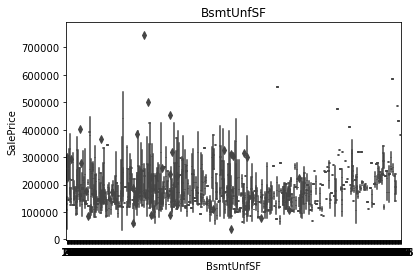

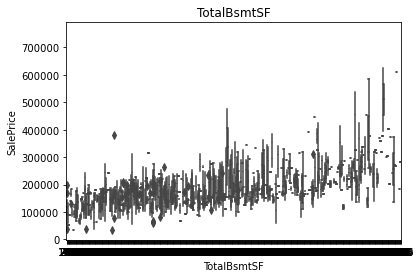

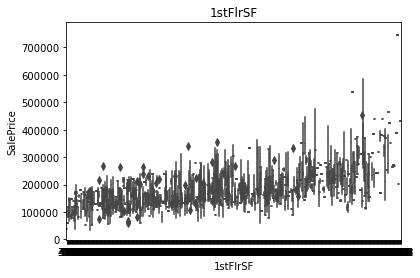

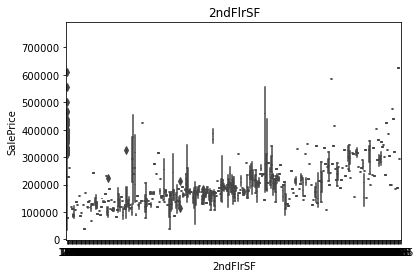

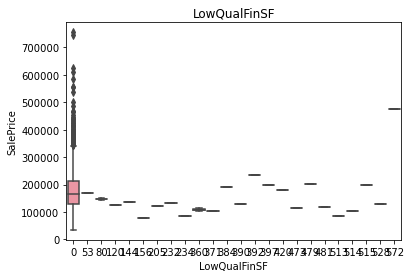

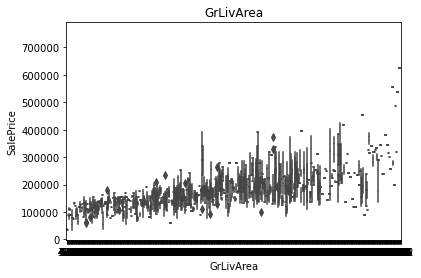

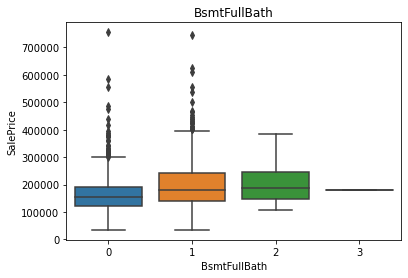

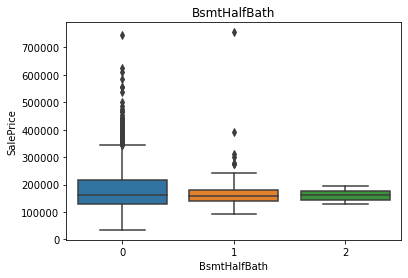

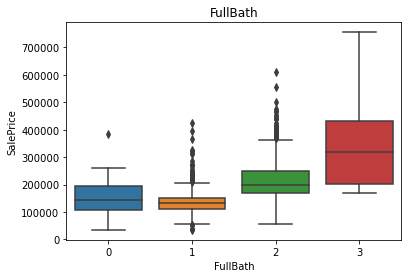

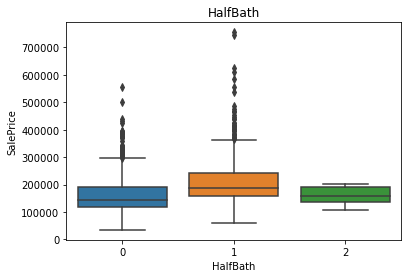

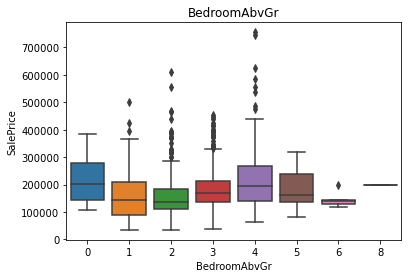

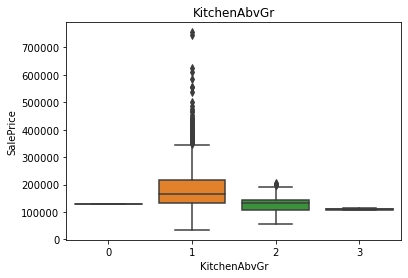

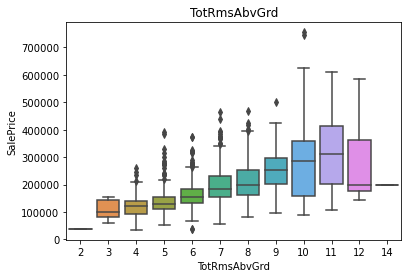

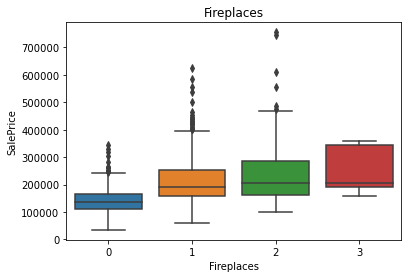

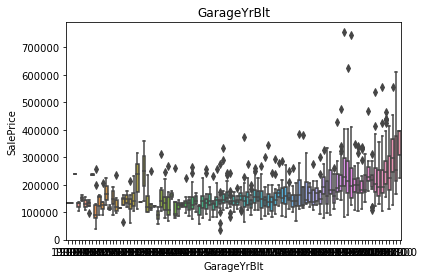

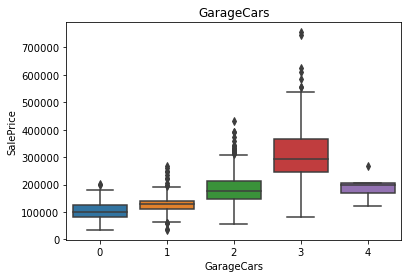

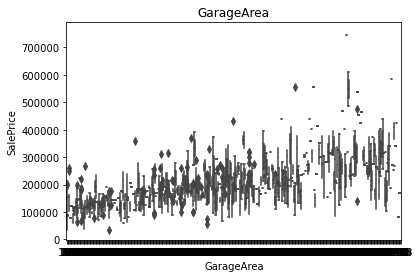

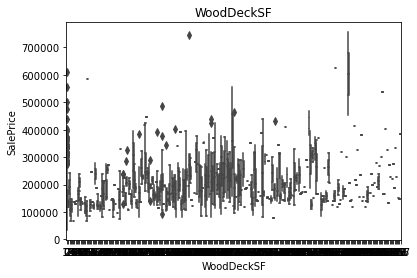

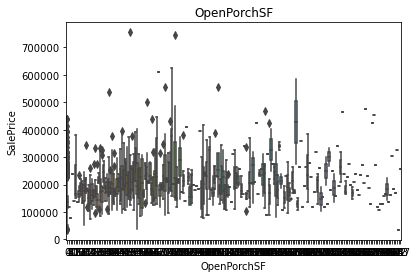

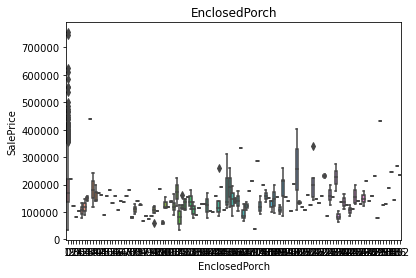

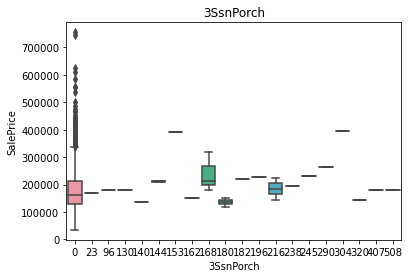

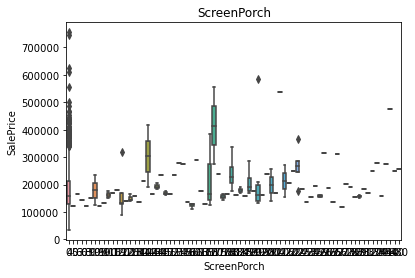

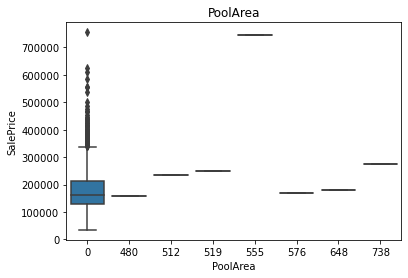

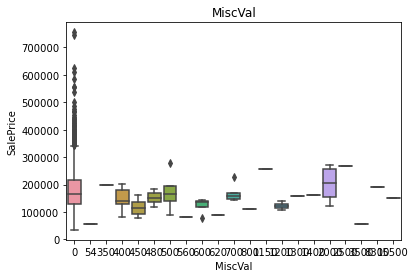

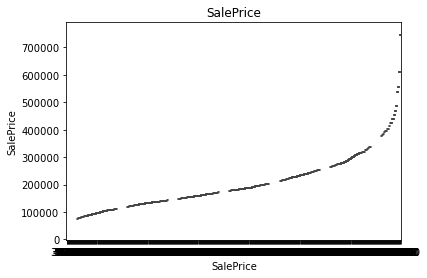

In [302]:
for x in range(len(num_cols)):
    sns.boxplot(data=train, x=num_cols[x], y='SalePrice')
    plt.title(num_cols[x])
    plt.show()

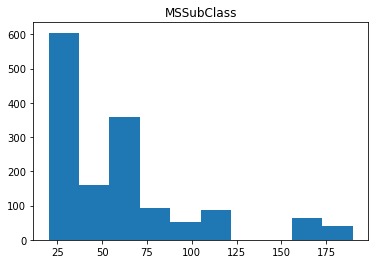

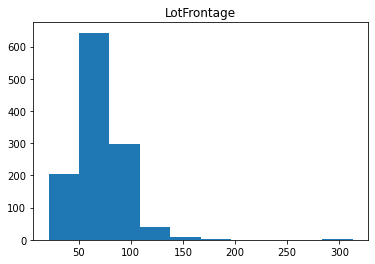

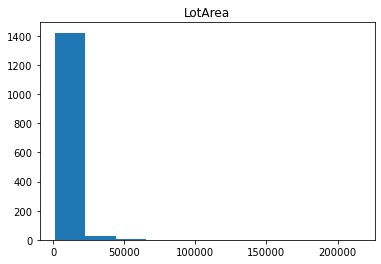

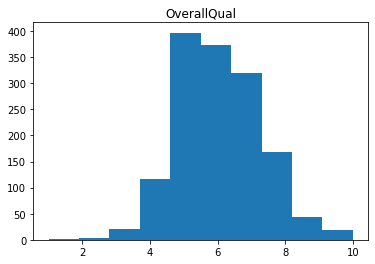

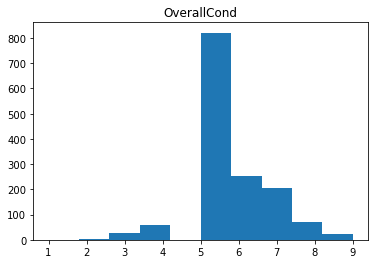

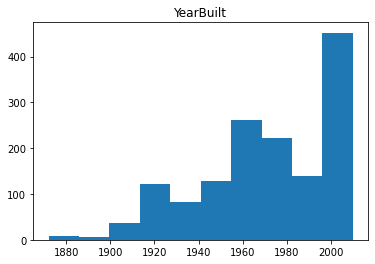

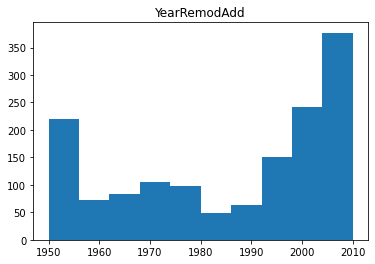

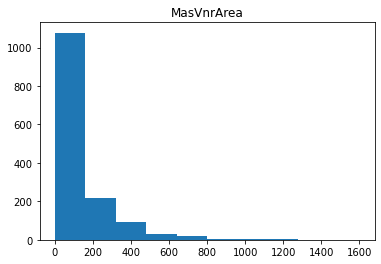

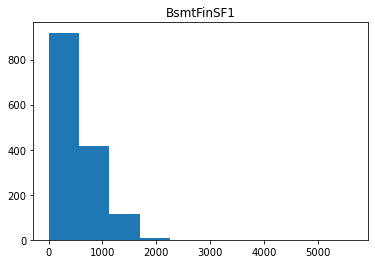

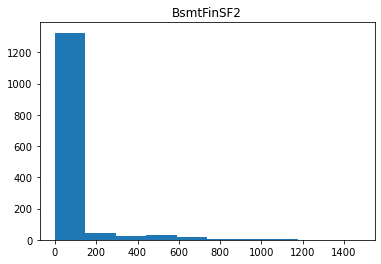

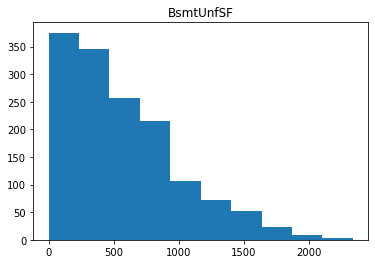

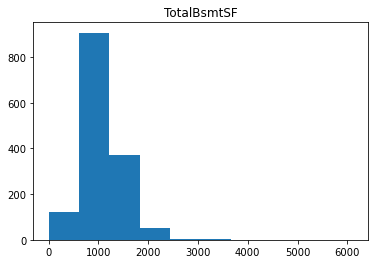

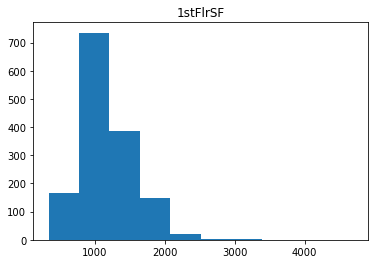

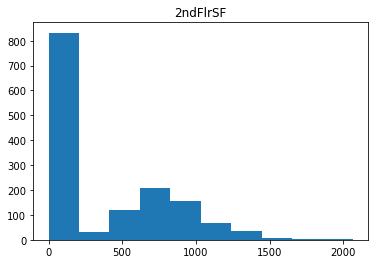

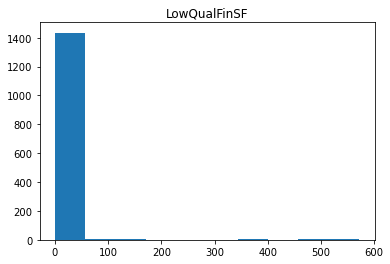

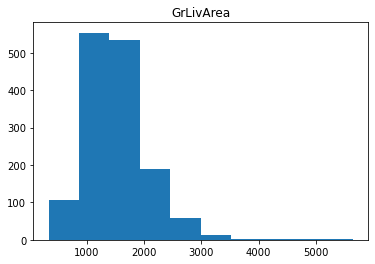

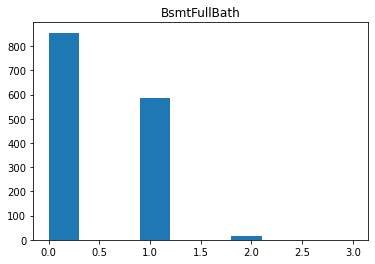

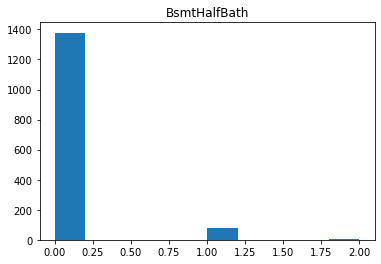

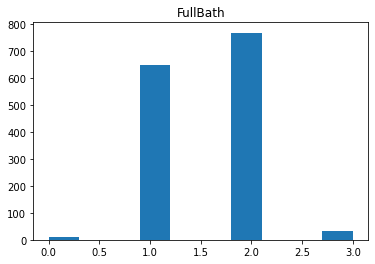

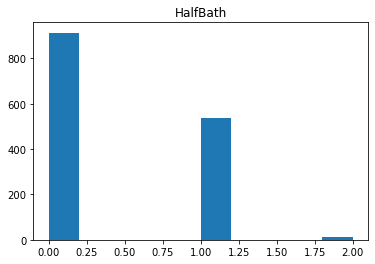

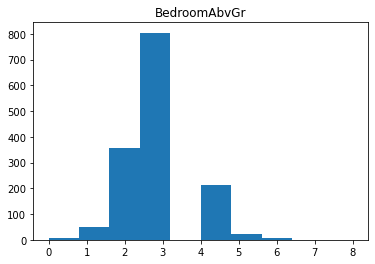

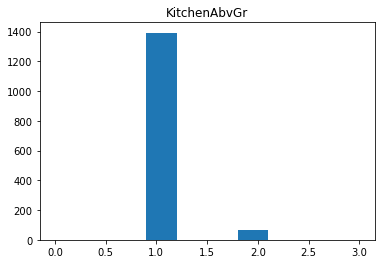

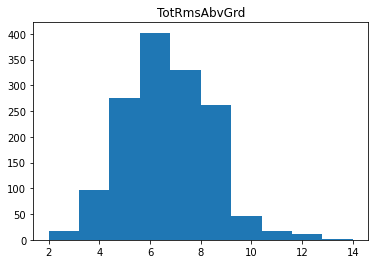

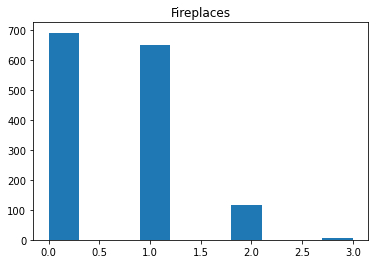

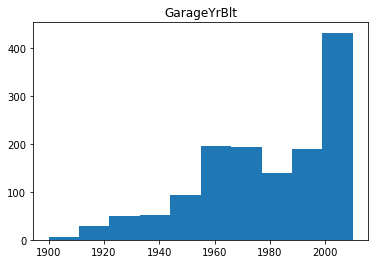

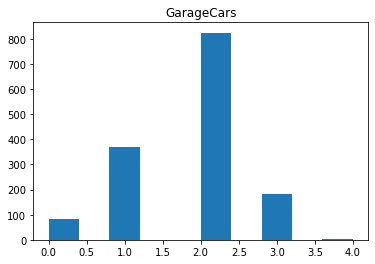

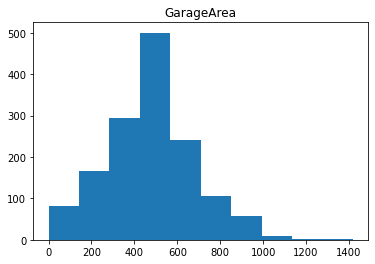

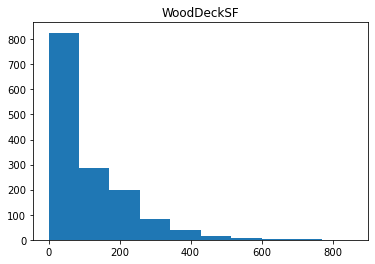

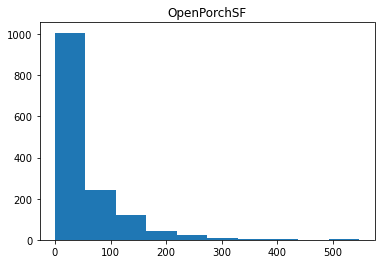

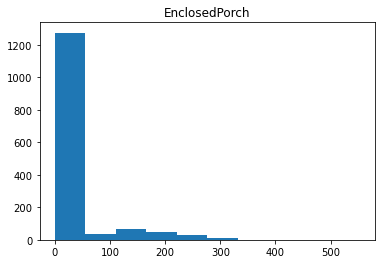

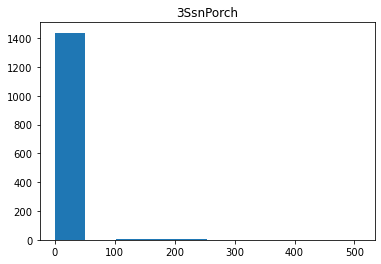

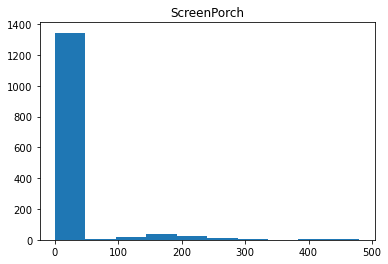

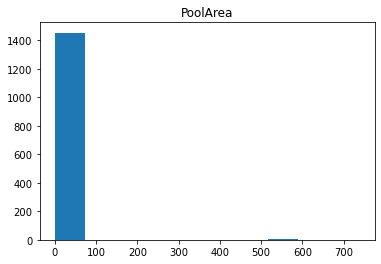

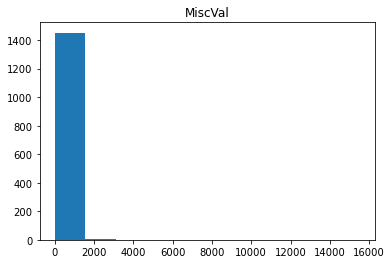

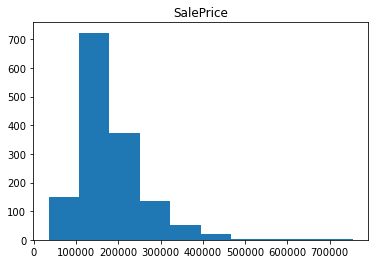

In [303]:
for x in range(len(num_cols)):
    plt.hist(train[num_cols[x]])
    plt.title(num_cols[x])
    plt.show()

In [350]:
num_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd']
#categorical_columns

<AxesSubplot:>

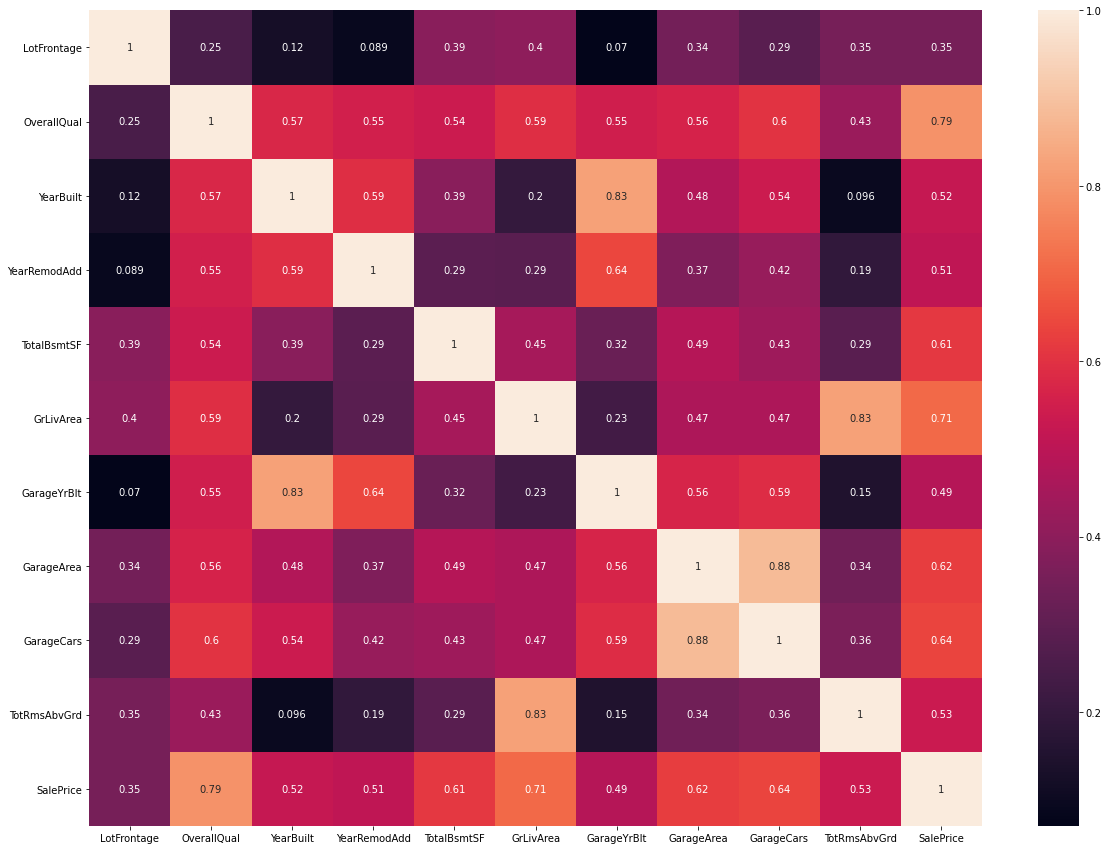

In [351]:
plt.subplots(figsize=(20,15))
corr_matrix_features = num_features
corr_matrix_features.append('SalePrice')
corr_matrix = train[corr_matrix_features].corr()
sns.heatmap(corr_matrix, annot=True)

# Dealing with null values in categorical features

In [352]:
full.dropna(subset=categorical_columns_select).shape

(2687, 75)

In [353]:
df_cleaned = full.dropna(subset=categorical_columns_select)
df_train_categorical = df_cleaned[categorical_columns_select]
df_train_categorical = df_train_categorical.reset_index()
df_train_categorical.drop(columns=['index'],axis=1,inplace= True)

In [354]:
df_train_categorical.shape

(2687, 12)

## After clean the data assign the target

In [ ]:
y_train = df_cleaned[df_cleaned['type_dt'] == 'train']['SalePrice']

# Dealing with null values in numerical features

In [355]:
df_train_num = df_cleaned[num_features]

In [356]:
df_train_num.shape

(2687, 11)

In [357]:
from sklearn.impute import SimpleImputer

In [358]:
imputer = SimpleImputer(strategy="median")
imputer.fit(df_train_num)
df_train_num = pd.DataFrame(imputer.transform(df_train_num), columns=num_features)
df_train_num.shape

(2687, 11)

In [359]:
df_train_num.head()

LotFrontage  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0         65.0          7.0     2003.0        2003.0        856.0     1710.0   
1         80.0          6.0     1976.0        1976.0       1262.0     1262.0   
2         68.0          7.0     2001.0        2002.0        920.0     1786.0   
3         60.0          7.0     1915.0        1970.0        756.0     1717.0   
4         84.0          8.0     2000.0        2000.0       1145.0     2198.0   

   GarageYrBlt  GarageArea  GarageCars  TotRmsAbvGrd  SalePrice  
0       2003.0       548.0         2.0           8.0   208500.0  
1       1976.0       460.0         2.0           6.0   181500.0  
2       2001.0       608.0         2.0           6.0   223500.0  
3       1998.0       642.0         3.0           7.0   140000.0  
4       2000.0       836.0         3.0           9.0   250000.0

In [360]:
df_train_categorical

MSZoning Electrical KitchenQual RoofStyle Neighborhood BsmtQual  \
0          RL      SBrkr          Gd     Gable      CollgCr       Gd   
1          RL      SBrkr          TA     Gable      Veenker       Gd   
2          RL      SBrkr          Gd     Gable      CollgCr       Gd   
3          RL      SBrkr          Gd     Gable      Crawfor       TA   
4          RL      SBrkr          Gd     Gable      NoRidge       Gd   
...       ...        ...         ...       ...          ...      ...   
2682       RL      SBrkr          TA     Gable      Mitchel       TA   
2683       RM      SBrkr          TA     Gable      MeadowV       TA   
2684       RM      SBrkr          TA     Gable      MeadowV       TA   
2685       RL      SBrkr          TA     Gable      Mitchel       TA   
2686       RL      SBrkr          TA     Gable      Mitchel       Gd   

     ExterQual BsmtExposure HouseStyle GarageFinish BsmtFinType1 GarageType  
0           Gd           No     2Story          RFn          GLQ     Attchd  
1           TA           Gd     1Story          RFn          ALQ     Attchd  
2           Gd           Mn     2Story          RFn          GLQ     Attchd  
3           TA           No     2Story          Unf          ALQ     Detchd  
4           Gd           Av     2Story          RFn          GLQ     Attchd  
...        ...          ...        ...          ...          ...        ...  
2682        TA           Av     1Story          RFn          Rec     Attchd  
2683        TA           No     2Story          Unf          Rec    CarPort  
2684        TA           No     2Story          Unf          Rec    CarPort  
2685        TA           No     1Story          Unf          ALQ     Detchd  
2686        TA           Av     2Story          Fin          LwQ     Attchd  

[2687 rows x 12 columns]

In [361]:
df_train_num.drop(columns=['SalePrice'],axis=1, inplace=True)

In [362]:
df_train_num.isnull().sum().sort_values()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
GarageYrBlt     0
GarageArea      0
GarageCars      0
TotRmsAbvGrd    0
dtype: int64

In [363]:
df_cleaned_2 = pd.concat([df_train_categorical, df_train_num, df_cleaned['type_dt'].reset_index().drop(columns=['index'],axis=1)], axis=1)
df_cleaned_2.shape

(2687, 23)

In [364]:
df_cleaned_2.isnull().sum().sort_values(ascending=False)

MSZoning        0
LotFrontage     0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
GarageYrBlt     0
GrLivArea       0
TotalBsmtSF     0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
GarageType      0
Electrical      0
BsmtFinType1    0
GarageFinish    0
HouseStyle      0
BsmtExposure    0
ExterQual       0
BsmtQual        0
Neighborhood    0
RoofStyle       0
KitchenQual     0
type_dt         0
dtype: int64

## Aplying one hot encoding

In [365]:
df_train_cleaned = pd.get_dummies(df_cleaned_2,columns=categorical_columns_select)

# Dividing training set and test data set

In [366]:
X = df_train_cleaned.loc[df_train_cleaned['type_dt'] == 'train']
X_test = df_train_cleaned.loc[df_train_cleaned['type_dt'] == 'test']
X.drop(columns=['type_dt'],axis=1,inplace=True)
X_test.drop(columns=['type_dt'],axis=1,inplace=True)

/home/victormgb/anaconda3/envs/studyml/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(array([  2.,   6.,  32., 148., 438., 389., 218.,  89.,  19.,   6.]),
 array([10.47194981, 10.77820213, 11.08445445, 11.39070677, 11.6969591 ,
        12.00321142, 12.30946374, 12.61571606, 12.92196838, 13.22822071,
        13.53447303]),
 <BarContainer object of 10 artists>)

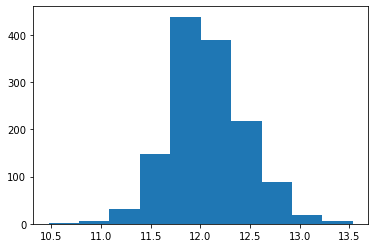

In [367]:
y_train = np.log(y_train)
plt.hist(y_train)

In [368]:
df_train_cleaned.shape

(2687, 91)

# Select ML Algorithms to Use

In [369]:
from sklearn.model_selection import train_test_split

# LinearRegression, RandomForest, RidgeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [371]:
#regressors = [LinearRegression(),]
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [372]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [373]:
y_pred = np.expm1(regressor.predict(X_test))

In [374]:
y_test = np.expm1(y_test)

In [375]:
y_pred

array([ 125024.11133257,  239417.41980129,  130978.05044127,
        210672.82628169,  132449.56133863,  131113.81855583,
        154871.05519313,  152032.17475399,  192089.35839122,
        189462.03270765,  474855.30401095,  157214.46038053,
        206648.43437986,  143047.99005521,  220289.51514452,
        304412.0499092 ,  129800.51823651,  141249.52215477,
        243085.14331236,  158896.67129767,  244124.46451533,
        117469.22121075,  352725.23374316,  155169.8997999 ,
        122132.15590363,  109126.99168912,  179492.89826169,
        289963.23853435,  197041.73624368,  163434.20981262,
        316246.20688804,  188526.69581631,   98898.54531119,
        134366.45324113,  102557.91643447,  206147.5675804 ,
        211507.63291512,  194704.76870457,   91825.56529605,
        175161.33495158,  195722.43868982,  130428.34819651,
        209829.75691096,  212350.52963789,  175439.58820988,
        160565.60920801,  242620.76592843,  314998.92193406,
        200955.85759714,

In [376]:
from sklearn.metrics import mean_squared_error

In [377]:
rms = mean_squared_error(y_test.to_numpy(), y_pred, squared=False)

In [378]:
rms

75786.93832431793

In [379]:
ridge = Ridge(alpha=1.0)

In [380]:
ridge.fit(X_train,y_train)

Ridge()

In [381]:
y_pred_ridge = np.expm1(ridge.predict(X_test))

In [382]:
y_pred_ridge

array([ 124970.10524158,  239401.55796769,  130938.26120815,
        210098.67976728,  132040.25327029,  131147.93716367,
        155003.24620788,  151872.45533505,  193596.91267649,
        189404.7932092 ,  471654.69125129,  156058.14429065,
        208115.67299442,  144278.61772834,  220693.21728284,
        304618.37593236,  130181.40392892,  142290.82733559,
        243360.58338679,  158773.81262536,  245401.20474291,
        110652.60555961,  352768.88835672,  154955.52737587,
        122018.90872729,  109105.89708544,  179250.97629527,
        290178.1045963 ,  196824.90886289,  162923.99753123,
        316627.77093331,  190200.99564602,   98782.59494347,
        134159.16579258,   99827.8509862 ,  206044.80799851,
        211312.34730095,  194482.96554281,   93910.94439492,
        174872.43493296,  195086.4094436 ,  130494.82528655,
        209373.26296563,  211747.39354486,  175033.54481596,
        160468.72848847,  242939.61653257,  313800.54600164,
        201574.86111211,

In [383]:
rms_ridge = mean_squared_error(y_test.to_numpy(), y_pred_ridge, squared=False)

In [384]:
rms_ridge

77289.50601414114

In [385]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [386]:
rf.fit(X_train, y_train);

In [387]:
rf_predictions = np.expm1(rf.predict(X_test))

In [388]:
rms_rf = mean_squared_error(y_test.to_numpy(), rf_predictions, squared=False)

In [389]:
rms_rf

33734.929117147716

In [390]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rms_rf / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 78.11 %.
